### importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df = data.iloc[:,2:]

In [4]:
df.shape

(400, 3)

In [5]:
df.sample(5)

,Age,EstimatedSalary,Purchased
184,33,60000,0
28,29,43000,0
136,20,82000,0
54,27,58000,0
334,57,60000,1


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),df['Purchased'],
                                                    test_size=0.3,random_state=0)

In [7]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [8]:
Y_train.shape, Y_test.shape

((280,), (120,))

### StandardScaler

In [9]:
# creating object of class
scaler = StandardScaler() 

# fit the scaler to train set, it will learn from X_train
scaler.fit(X_train) 

# transform train and test sets
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [11]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [12]:
X_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [13]:
np.round(X_train.describe(),1)
# we can see mean and std before scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)
# we can see mean and std after scaling

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


### effect of scaling

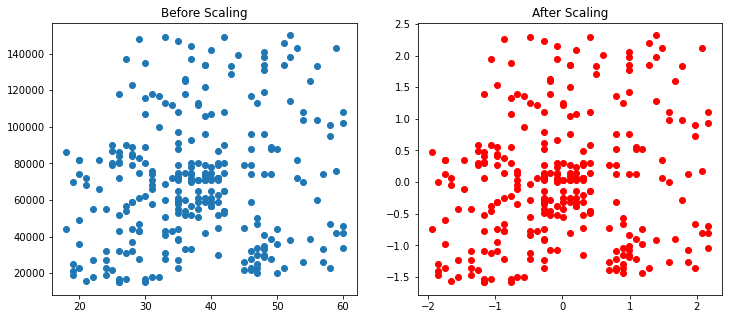

In [15]:
# on training data

fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

# after scaling
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color = 'red')
ax2.set_title('After Scaling')

plt.show()

In [ ]:
# Before Scaling mean is around 40
# After Scaling mean is  0
# we can see data is centered

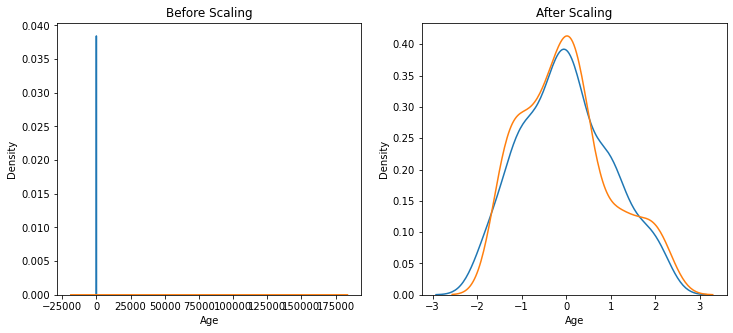

In [16]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before Scaling')


# after scaling
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Scaling')

plt.show()

In [ ]:
# Before scaling 
# there is no comparison between age and salary because of different scale

# After scaling
# age and salary are comparable as they are in a specific scale 
# hence the algorithm will perform better

### comparison of distribution

<AxesSubplot:title={'center':'age distribution after scaling'}, xlabel='Age', ylabel='Density'>

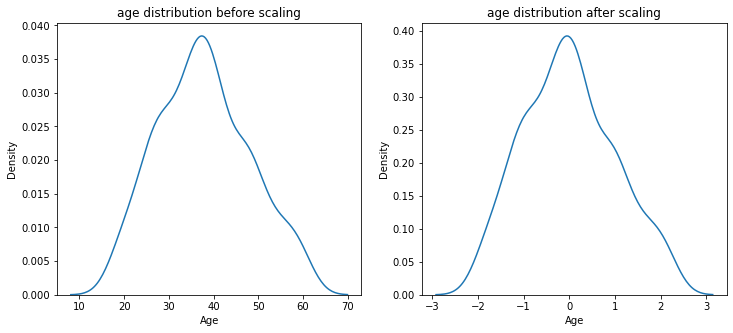

In [17]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('age distribution before scaling')
sns.kdeplot(X_train['Age'],ax=ax1)


# after scaling
ax2.set_title('age distribution after scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

In [ ]:
# distribution is same but scale is changed

<AxesSubplot:title={'center':'salary distribution after scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

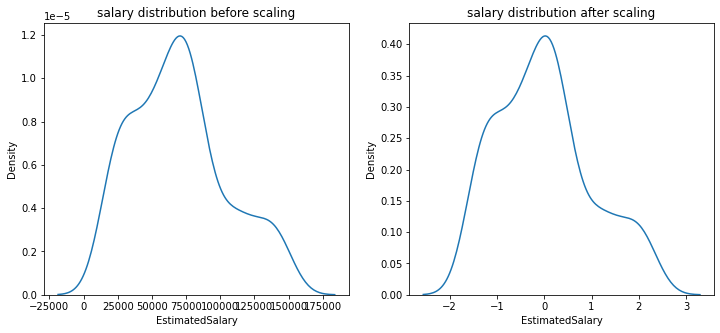

In [18]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

# before scaling
ax1.set_title('salary distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


# after scaling
ax2.set_title('salary distribution after scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

In [ ]:
# distribution is same but scale is changed

### why scaling is important

In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(X_train,Y_train) # unscaled data

lr_scaled.fit(X_train_scaled,Y_train) # scaled data

LogisticRegression()

In [21]:
y_pred = lr.predict(X_test)

y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [22]:
print('On Actual Data',accuracy_score(Y_test,y_pred))
print('On Scaled Data',accuracy_score(Y_test,y_pred_scaled))

On Actual Data 0.6583333333333333
On Scaled Data 0.8666666666666667
